## Matching Polytopes

In this tutorial we will use `polymake` to construct and analyse matching polytopes.

First we construct a graph, the complete graph on four nodes:

    


In [1]:
$K4=new GraphAdjacency(4);

In [2]:
for (my $i=0; $i<4; ++$i) {
  for (my $j=$i+1; $j<4; ++$j) {
    $K4->edge($i,$j);
  }
}



(See also the [Tutorial on Graphs](apps_graph.ipynb) for more on the construction of graphs.)

Next we like to have the node-edge-incidence matrix of our graph. Since the latest release of `polymake` does not yet support this, we have to write the function ourselves:

    


In [3]:
sub node_edge_incidences {
    my $g=shift;
   my $A=new Matrix<Int>($g->nodes, $g->edges);
    my $k=0;
   for (my $i=0; $i<$g->nodes-1; ++$i) {
       foreach (@{$g->adjacent_nodes($i)}) {
           if ($_>$i) {
               $A->[$i]->[$k]=1;
               $A->[$_]->[$k]=1;
               ++$k;
           }
       }
   }
   return $A;
}


Now we can construct the node-edge-incidence matrix of our graph `K4`:

    


In [4]:
$A=node_edge_incidences($K4);
print $A;

1 1 1 0 0 0
1 0 0 1 1 0
0 1 0 1 0 1
0 0 1 0 1 1



With this we can now construct the constraint matrix consisting of an upper part for the nonnegativity constraints $x_e \ge 0$ ...

    


In [5]:
$I=new Matrix<Int>([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]]);
$Block1=new Matrix<Int>(new Vector<Int>([0,0,0,0,0,0]) | $I);



... and a lower part for the constraints $\Sigma_e x_e \le 1$  for each vertex $v \in V$, where the sum is over all edges e containing v:

    


In [6]:
$Block2=new Matrix<Int>(new Vector<Int>([1,1,1,1]) | -$A);



Now we can put both parts together and define the polytope:

    


In [7]:
$Ineqs=new Matrix<Rational>($Block1 / $Block2);
$P=new Polytope<Rational>(INEQUALITIES=>$Ineqs);



The matching polytope of `K4` is the integer hull of `P`:

    


In [8]:
$P_I=new Polytope<Rational>(POINTS=>$P->LATTICE_POINTS);

Click here for additional output 
 
polymake: used package lrs
 Implementation of the reverse search algorithm of Avis and Fukuda.
 Copyright by David Avis.
 http://cgm.cs.mcgill.ca/~avis/C/lrs.html



We can analyse some elementary properties of `P_I` ...

    


In [9]:
print $P_I->POINTS;

1 0 0 0 0 0 0
1 0 0 0 0 0 1
1 0 0 0 0 1 0
1 0 0 0 1 0 0
1 0 0 1 0 0 0
1 0 0 1 1 0 0
1 0 1 0 0 0 0
1 0 1 0 0 1 0
1 1 0 0 0 0 0
1 1 0 0 0 0 1


In [10]:
print $P_I->FACETS;

0 0 0 0 0 0 1
0 0 0 0 0 1 0
1 -1 -1 -1 0 0 0
1 -1 -1 0 -1 0 0
0 0 0 0 1 0 0
0 0 0 1 0 0 0
0 0 1 0 0 0 0
1 -1 0 -1 0 -1 0
1 -1 0 0 -1 -1 0
1 0 0 -1 0 -1 -1
1 0 0 0 -1 -1 -1
0 1 0 0 0 0 0
1 0 -1 -1 0 0 -1
1 0 -1 0 -1 0 -1


In [11]:
print $P_I->N_FACETS;

14


... and compare them with the according properties of the defining polytope `P`:

    


In [12]:
print $P->VERTICES;

1 0 0 1 1 0 0
1 1 0 0 0 0 1
1 0 0 0 1/2 1/2 1/2
1 0 0 0 0 0 1
1 0 1/2 1/2 0 0 1/2
1 0 0 1 0 0 0
1 1/2 1/2 0 1/2 0 0
1 0 0 0 1 0 0
1 0 1 0 0 0 0
1 1 0 0 0 0 0
1 0 0 0 0 0 0
1 0 1 0 0 1 0
1 0 0 0 0 1 0
1 1/2 0 1/2 0 1/2 0


In [13]:
print $P->VOLUME;

1/72

In [14]:
print $P_I->VOLUME;

1/90

Next we analyse the combinatorics of `P_I`:
<img src=attachment:gale.png width=300 alt="Gale diagram" class="center-block">
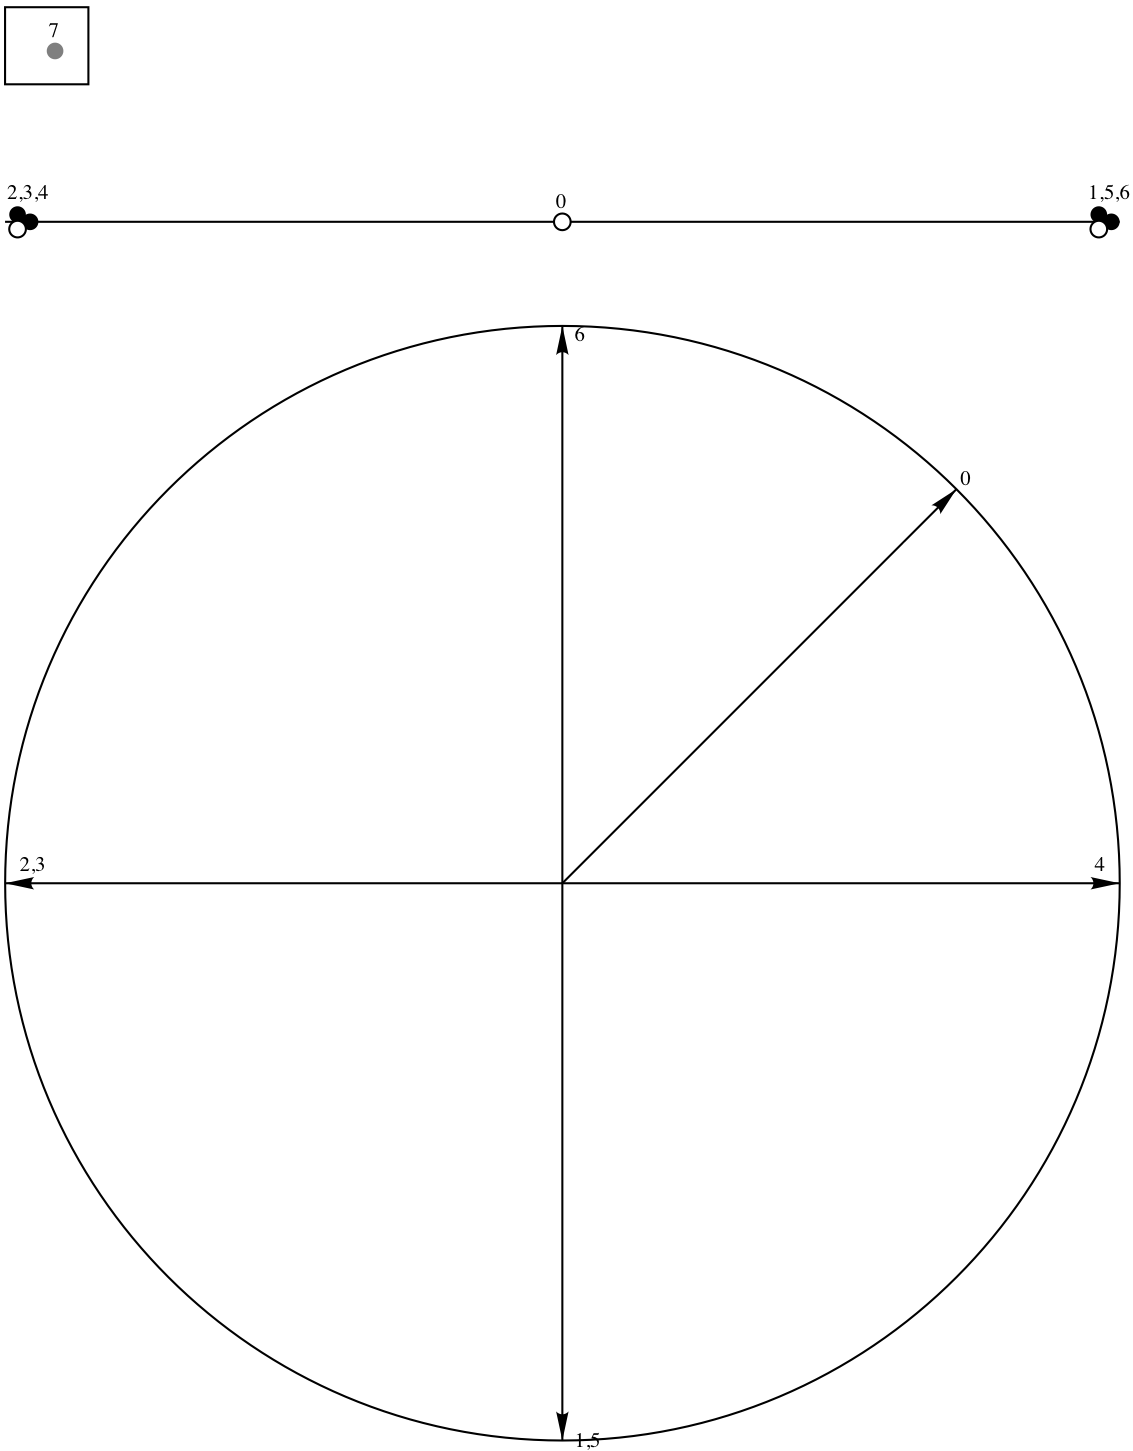

In [15]:
print $P_I->AMBIENT_DIM, " ", $P_I->DIM;

6 6

In [16]:
print $P_I->F_VECTOR;

10 39 78 86 51 14

In [17]:
print $P_I->FACET_SIZES;

8 8 6 6 8 8 8 6 6 6 6 8 6 6

In [18]:
$facet0=facet($P_I,0);

In [19]:
print $facet0->AMBIENT_DIM, " ", $facet0->DIM;

6 5

In [20]:
print rows_labeled($facet0->VERTICES_IN_FACETS);

0:0 2 3 4 5 7
1:3 4 5 6 7
2:2 4 5 6 7
3:0 1 3 5 6 7
4:0 1 2 5 6 7
5:0 1 2 3 4 7
6:1 3 4 6 7
7:1 2 4 6 7
8:0 1 2 3 4 5 6


In [21]:
$facet0->GALE;


The Gale diagram of `facet0` is depicted on the right.
